# Make each level to each Curve CSV FILE

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_begin = []
num_row = []
start = 0
number_of_corner = 6
f_1 = 'beginner_expert_processedData/beginner/beginner_'
f_3 = '.csv'
num_begin = 19
curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]

df_concat = pd.DataFrame()

for curve_num in range(start,number_of_corner):
#     print(num_row)
    for idx in range(1, num_begin+1):
        tmp_file = f_1+str(idx)+'_new2'+f_3
        df = pd.read_csv(tmp_file)
        df = df.dropna()
        
        tmp = df.astype(float)
        tmp['level'] =0
        
        tmpcorner = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
        num_row.append(np.size(tmpcorner,0)) 
        
        df_begin.append(tmpcorner)
        df_concat = pd.concat([df_concat,df_begin[idx-1]])      
           
    df_concat.to_csv('cornerData/corner_'+str(curve_num+1)+'_begin'+'.csv')
    df_concat = pd.DataFrame()
    df_begin = []
    


In [4]:
df_exp = []
f_1 = 'beginner_expert_processedData/expert/expert_'
f_3 = '.csv'
num_exp = 19

df_concat = pd.DataFrame()

for curve_num in range(start,number_of_corner):
    for idx in range(1, num_exp+1):
        tmp_file = f_1+str(idx)+'_new2'+f_3
        df = pd.read_csv(tmp_file)
        df = df.dropna()

        tmp = df.astype(float)
        tmp['level'] =1

        tmpcorner = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
        num_row.append(np.size(tmpcorner,0)) 

        df_exp.append(tmpcorner)
        df_concat = pd.concat([df_concat,df_exp[idx-1]])
    df_concat.to_csv('cornerData/corner_'+str(curve_num+1)+'_expert'+'.csv')
    df_concat = pd.DataFrame()
    df_exp = []

In [5]:
print(num_row)

[72, 71, 78, 91, 68, 69, 75, 84, 76, 79, 97, 102, 101, 89, 63, 74, 80, 69, 78, 46, 57, 49, 43, 50, 54, 61, 58, 50, 51, 59, 68, 50, 48, 69, 59, 60, 48, 52, 492, 214, 318, 311, 429, 102, 73, 77, 124, 94, 121, 218, 833, 695, 110, 90, 80, 329, 73, 111, 98, 105, 88, 115, 105, 112, 95, 94, 108, 127, 140, 135, 99, 97, 86, 90, 111, 97, 28, 27, 26, 27, 31, 31, 30, 30, 34, 30, 41, 36, 37, 33, 36, 29, 28, 31, 25, 125, 148, 151, 146, 129, 147, 145, 131, 145, 146, 154, 150, 194, 156, 183, 136, 142, 121, 494, 68, 64, 64, 71, 68, 65, 66, 66, 67, 66, 72, 66, 67, 70, 68, 62, 68, 66, 72, 51, 45, 46, 50, 53, 48, 47, 46, 44, 45, 52, 47, 45, 46, 47, 47, 43, 44, 43, 71, 68, 69, 67, 68, 81, 69, 69, 72, 77, 69, 70, 79, 71, 78, 69, 113, 77, 76, 87, 86, 86, 84, 81, 81, 111, 88, 80, 78, 77, 77, 84, 80, 77, 79, 79, 80, 84, 25, 26, 26, 26, 27, 25, 25, 26, 26, 25, 25, 25, 25, 26, 25, 25, 25, 25, 25, 123, 132, 124, 125, 117, 126, 129, 119, 126, 122, 133, 126, 128, 125, 138, 117, 127, 133, 131]


In [6]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler


left_column = [
#'Time',
    'Distance','GPS Latitude','GPS Longitude','Damper Velocity (Calc) FL','Damper Velocity (Calc) FR','Damper Velocity (Calc) RL',
'Damper Velocity (Calc) RR','Corr Dist','Corr Dist (Unstretched)','Corr Speed','Brake Pos',
'CG Accel Lateral','CG Accel Longitudinal','CG Accel Vertical','CG Height','Camber FL','Camber FR','Camber RL','Camber RR','Car Coord X',
'Car Coord Y','Car Coord Z','Car Pos Norm','Chassis Pitch Angle','Chassis Pitch Rate','Chassis Roll Angle','Chassis Roll Rate',
'Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate','Drive Train Speed','Engine RPM','Ground Speed',
'Ride Height FL','Ride Height FR','Ride Height RL','Ride Height RR','Road Temp','Self Align Torque FL','Self Align Torque FR',
'Self Align Torque RL','Self Align Torque RR','Session Time Left','Steering Angle','Suspension Travel FL','Suspension Travel FR',
'Suspension Travel RL','Suspension Travel RR','Tire Load FL','Tire Load FR','Tire Load RL','Tire Load RR','Tire Loaded Radius FL',
'Tire Loaded Radius FR','Tire Loaded Radius RL','Tire Loaded Radius RR','Tire Pressure FL','Tire Pressure FR','Tire Pressure RL','Tire Pressure RR',
'Tire Rubber Grip FL','Tire Rubber Grip FR','Tire Rubber Grip RL','Tire Rubber Grip RR','Tire Slip Angle FL','Tire Slip Angle FR',
'Tire Slip Angle RL','Tire Slip Angle RR','Tire Slip Ratio FL','Tire Slip Ratio FR','Tire Slip Ratio RL','Tire Slip Ratio RR',
'Tire Temp Core FL','Tire Temp Core FR','Tire Temp Core RL','Tire Temp Core RR','Tire Temp Inner FL','Tire Temp Inner FR',
'Tire Temp Inner RL','Tire Temp Inner RR','Tire Temp Middle FL','Tire Temp Middle FR','Tire Temp Middle RL',
'Tire Temp Middle RR','Tire Temp Outer FL','Tire Temp Outer FR','Tire Temp Outer RL','Tire Temp Outer RR','Toe In FL',
'Toe In FR','Toe In RL','Toe In RR','Wheel Angular Speed FL','Wheel Angular Speed FR','Wheel Angular Speed RL','Wheel Angular Speed RR',
'CG Distance','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration','level']


#Hyper-parameters
num_epochs = 50
batches = 1
learning_rate = 0.003
input_size = len(left_column)-1 # left column except 'level'
output_size = 2 # Expert and Beginner
hidden_size = 10 # ?
num_layers = 3
num_begin_train = 15*(number_of_corner-start)
num_exp_train = 15*(number_of_corner-start)
num_begin_test = num_begin*(number_of_corner-start) - num_begin_train
num_exp_test = num_exp*(number_of_corner-start) - num_exp_train

## Define GRU, Loss func and Optimizer
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layer, output_size):
        super(GRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         out, _ = self.gru(x, h0)
        out, _ = self.lstm(x, (h0,c0)) 
        out = out[:, -1, :]
        out = self.fc(out)
        return out

gru = GRU(input_size, hidden_size, num_layers, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=learning_rate)  

#  gru.fc.weight.data.fill_(1)
#  gru.fc.bias.data.fill_(1)
print(gru.fc.weight,gru.fc.bias)
## Data Processing
array_x = []
array_y = []
input_x = []
input_y = []
n_row = []

df_tmp_begin = pd.DataFrame() 
df_tmp_exp = pd.DataFrame() 
for curve_num in range(start,number_of_corner):
    df_tmp_begin = pd.concat([df_tmp_begin,pd.read_csv('cornerData/corner_'+str(curve_num+1)+'_begin.csv')])
    df_tmp_exp   = pd.concat([df_tmp_exp,pd.read_csv('cornerData/corner_'+str(curve_num+1)+'_expert.csv')])    
df_curve1 = pd.concat([df_tmp_begin, df_tmp_exp], ignore_index=True) 
df_curve1 = df_curve1.loc[:,left_column]
df_curve1_saved = df_curve1.loc[:,left_column] # data backup
df_curve1.to_csv('cornerData/corner_'+'_dfcurve1'+'.csv')



# scaler = StandardScaler()
# scaler.fit(x)
# scaler.mean_
# x = scaler.transform(x)
# print(x_normal)
# # print(x)
# # print(x['Distance'])
# print(type(x))
# print(type(x_normal))

datum = df_curve1_saved
yyy = datum.pop('level')
left = left_column.remove('level')
for i in range(0,num_begin*(number_of_corner-start) + num_exp*(number_of_corner-start)):
#     x = df_curve1_saved.loc[0:num_row[i]-1
    y = yyy.loc[0:num_row[i]-1]
    x_original = datum.loc[0:num_row[i]-1]
    scaler = StandardScaler()
    scaler.fit(x_original)
    scaler.mean_
    x_normal = scaler.transform(x_original)
    x = pd.DataFrame(x_normal,columns=left)
    datum.drop(range(0,num_row[i]),inplace=True)
    datum.reset_index(drop=True, inplace=True)
    yyy.drop(range(0,num_row[i]),inplace=True)
    yyy.reset_index(drop=True, inplace=True)
    # y = x.pop('level')
    
    # DATA Augmentation
    nan = pd.DataFrame(np.nan,columns=range(x.shape[1]),index=range(x.shape[0]))
    alter = pd.concat([x,nan]).sort_index()
    alter = alter.interpolate()
    alter.reset_index(drop=True, inplace=True)
    x_aug = alter[alter.index%2==1]
#     print(alter[alter.index%2==0])
#     print(alter[alter.index%2==1])
    
    array_x.append(x)
    array_x.append(x_aug)
    array_y.append(y)
    array_y.append(y)

    
## Randomize sequence 
sequence = np.arange(num_begin*(number_of_corner-start) + num_exp*(number_of_corner-start))
np.random.shuffle(sequence)
# sequence = [0,1,2,15,4,5,6,7,8,9,18,11,12,13,14,19,20,21,34,23,24,25,26,27,28,37,30,31,32,33,3,16,17,10,22,35,36,29]
print(sequence)

for i in sequence:
    input_x.append(array_x[i])
    input_y.append(array_y[i])
    n_row.append(num_row[i])



## Train 
loss_list = []
iteration_list = []
accuracy_list = []
test_list=[]
count = 0
# torch.backends.cudnn.benchmark = True
for epoch in range(num_epochs):
    for i in range(0,num_begin_train + num_exp_train):

        # array type (numpy)
        X = np.array(input_x[i])
        X = X.reshape(-1,n_row[i],input_size)
        Y = np.array(input_y[i])   
        
        # tensor type (pytorch)
        X = torch.from_numpy(X)
        X = X.float()
        Y = torch.tensor([Y[0]])
        Y = Y.type(torch.LongTensor)
#         Y = Y.float()
        
        optimizer.zero_grad()
        output = gru(X)
        loss = criterion(output, Y)
        
        # Backward and optimize
#         optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         count += 1
#         loss_list.append(loss.data)
#         iteration_list.append(count)
#         accuracy_list.append(accuracy)
#         print (f'Loss: {loss.item():.4f}')
    count += 1
    loss_list.append(loss.data)
    iteration_list.append(count)
    print (f'Loss: {loss.item():.4f}')
## Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for i in range(num_begin_train + num_exp_train, num_begin*(number_of_corner-start) + num_exp*(number_of_corner-start)):
        
        # array type (numpy)
        print(i)
        X = np.array(input_x[i])
        X = X.reshape(-1,n_row[i],input_size)
        Y = np.array(input_y[i])   

        # tensor type (pytorch)
        X = torch.from_numpy(X)
        X = X.float()
        Y = torch.tensor([Y[0]])
        Y = Y.type(torch.LongTensor)
#         Y = Y.float()
        output = gru(X)
        _, predicted = torch.max(output.data, 1)
        n_samples += Y.size(0)
        n_correct += (predicted == Y).sum().item()
        print(Y, predicted)
        


    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the {num_begin_test + num_exp_test} test images: {acc} %')



Parameter containing:
tensor([[ 0.1915, -0.0616,  0.1172, -0.1089,  0.0210,  0.2315, -0.0402,  0.0206,
          0.0622,  0.2508],
        [ 0.2874,  0.1332,  0.2213, -0.2862,  0.0982,  0.0610, -0.1054, -0.3075,
         -0.0683,  0.1958]], requires_grad=True) Parameter containing:
tensor([0.1958, 0.1598], requires_grad=True)
[217  24  68  71 179  55  20 161 121 147 221 123 102 124 114 144  97   0
  61  77  67  43   2  70 187  91   4 107 172  51 186  50 103 119  96  89
  41  56  78 222 188  62 204  83 208  99  40 223 137 202   8  47  19 128
 184  33 218 151  42 214  37 198 173 190 203  17 199  52  54   3  80 210
 163  28  87 156  49 191 200 116 115  74 224  22 227 152 120 101   9 189
 134 111 215  29 166 105 220 159  73 125  82  65 133 118 153  93  63  36
 142 206 183  25 193 195  34 170  12   1 139 176  66 143  23  26 178  85
 129  30  31 180 216  59  10 160  45 110  32 135 169  81 108 194 175 174
  95 146  84 131 157 109  79 140  72  14 167  16  86 126 164   5  98 112
 104   7 117 19

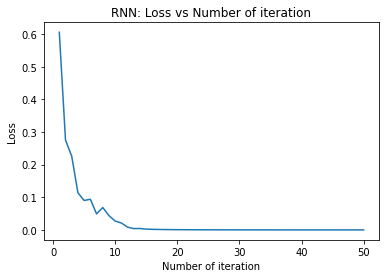

Accuracy of the network on the 48 test images: 83.33333333333333 %
tensor([0]) tensor([0]) tensor([[ 5.1794, -5.6350]])


In [7]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()
print(f'Accuracy of the network on the {num_begin_test + num_exp_test} test images: {acc} %')
print(predicted, Y, output)
# print(iteration_list)
# # visualization accuracy 
# plt.plot(iteration_list,accuracy_list,color = "red")
# plt.xlabel("Number of iteration")
# plt.ylabel("Accuracy")
# plt.title("RNN: Accuracy vs Number of iteration")
# plt.savefig('graph.png')
# plt.show()

In [8]:
food = 'bread'
vars()['cat'] = 123
print(cat)
print(type(cat))

123
<class 'int'>


In [9]:
a = pd.DataFrame() 
print(a)

Empty DataFrame
Columns: []
Index: []


In [10]:
s = pd.Series([0, 1, np.nan, 10])
s.interpolate()

0     0.0
1     1.0
2     5.5
3    10.0
dtype: float64

In [11]:
print(food)

bread


In [93]:
# print(x)
x.shape
nan = pd.DataFrame(np.nan,columns=range(x.shape[1]),index=range(x.shape[0]))
alter = pd.concat([x,nan]).sort_index()
alter = alter.interpolate()
alter.reset_index(drop=True, inplace=True)
print(alter[alter.index%2==0])
print(alter[alter.index%2==1])


(131, 102)


TypeError: 'alter1' is an invalid keyword argument for print()

In [ ]:
from sklearn.preprocessing import StandardScaler
print(x['Distance'])
scaler = StandardScaler()
print(scaler.fit(x))
print(scaler.mean_)
# print(scaler.transform(x))
x_normal = scaler.transform(x)
print(x_normal)
# print(x)
# print(x['Distance'])
print(type(x))
print(type(x_normal))

In [ ]:
# %reset -f
print(gru.fc.weight,gru.fc.bias)